<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Daten-einlesen-und-Daten-verstehen" data-toc-modified-id="MNIST-Daten-einlesen-und-Daten-verstehen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Daten einlesen und Daten verstehen</a></span></li><li><span><a href="#Mal-beispielhaft-ein-Trainingsbild-anzeigen" data-toc-modified-id="Mal-beispielhaft-ein-Trainingsbild-anzeigen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mal beispielhaft ein Trainingsbild anzeigen</a></span></li><li><span><a href="#Perzeptrongewichtsmatrix-erstellen" data-toc-modified-id="Perzeptrongewichtsmatrix-erstellen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perzeptrongewichtsmatrix erstellen</a></span></li><li><span><a href="#Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix" data-toc-modified-id="Aktivierungen-berechnen:-Input-mal-Gewichtsmatrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aktivierungen berechnen: Input mal Gewichtsmatrix</a></span></li><li><span><a href="#Outputs-berechnen" data-toc-modified-id="Outputs-berechnen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outputs berechnen</a></span></li><li><span><a href="#Fehler-berechnen" data-toc-modified-id="Fehler-berechnen-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fehler berechnen</a></span></li><li><span><a href="#Gewichtsaktualisierungen-berechnen" data-toc-modified-id="Gewichtsaktualisierungen-berechnen-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gewichtsaktualisierungen berechnen</a></span></li><li><span><a href="#Testen-des-Perzeptrons" data-toc-modified-id="Testen-des-Perzeptrons-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testen des Perzeptrons</a></span></li><li><span><a href="#Perzeptron-Training" data-toc-modified-id="Perzeptron-Training-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perzeptron Training</a></span></li></ul></div>

# MNIST Daten einlesen und Daten verstehen

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# download and read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.num_examples

55000

In [4]:
mnist.test.num_examples

10000

In [5]:
mnist.validation.num_examples

5000

In [6]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(55000, 784)

In [9]:
28*28

784

In [10]:
y_train.shape

(55000, 10)

In [11]:
y_train

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000, 10)

# Mal beispielhaft ein Trainingsbild anzeigen

In [117]:
from random import randint
rnd_img_nr = randint(0,y_train.shape[0]-1)

In [118]:
rnd_img_nr

46201

In [16]:
row_vec = x_train[rnd_img_nr, :]

In [17]:
row_vec.shape

(784,)

In [18]:
M = row_vec.reshape(28, 28)

In [19]:
M.shape

(28, 28)

In [20]:
from matplotlib import pyplot as plt

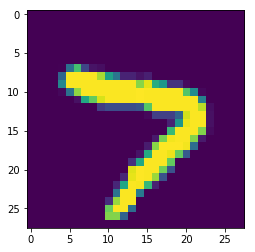

In [21]:
plt.imshow(M)
plt.show()

In [22]:
one_hot_vec = y_train[rnd_img_nr, :]

In [23]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [24]:
import numpy as np
np.argmax(one_hot_vec)

7

# Perzeptrongewichtsmatrix erstellen

In [25]:
nr_inputs = 28*28 + 1
nr_outputs = 10

In [26]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [27]:
W

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [28]:
W.shape

(785, 10)

In [29]:
low = -1
high = +1
W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )

In [30]:
W

array([[ 0.98217299, -0.74597356,  0.35809625, ...,  0.66959283,
        -0.44177468,  0.44120699],
       [ 0.96392308, -0.08904529, -0.16174839, ...,  0.19101667,
         0.33405585,  0.65727748],
       [-0.69276988, -0.25929605,  0.85781933, ...,  0.88599602,
         0.20958176,  0.91543537],
       ..., 
       [ 0.31710305,  0.70870706, -0.33074102, ..., -0.67863114,
         0.79583496, -0.48341326],
       [-0.96654919,  0.60984106, -0.43001817, ..., -0.96512945,
         0.59720685,  0.05128884],
       [-0.09408255, -0.03947356,  0.81951732, ..., -0.75667087,
         0.68035581, -0.9626317 ]])

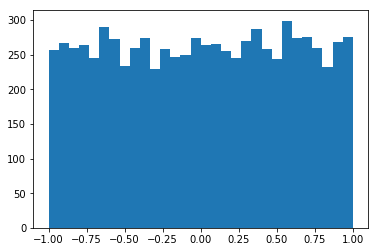

In [31]:
plt.hist(W.reshape(-1), bins=30)
plt.show()

In [32]:
def create_new_perceptron():
    low = -1
    high = +1
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W

W = create_new_perceptron()

# Aktivierungen berechnen: Input mal Gewichtsmatrix

In [33]:
row_vec.shape

(784,)

In [34]:
type(row_vec)

numpy.ndarray

In [35]:
x = np.append(row_vec,[1])

In [36]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [37]:
x.shape

(785,)

In [38]:
x.ndim

1

In [39]:
W.shape

(785, 10)

In [40]:
W.ndim

2

In [41]:
# Das folgende ist nicht was wir wollen!
# act = x * W 

In [42]:
act = np.matmul(x, W)

In [43]:
act.shape

(10,)

In [44]:
act = act.reshape(-1)

In [45]:
act

array([ 1.54231445, -2.09389288,  5.37173443, -8.98203196,  6.22884628,
        1.23164254, -6.46031461, -8.49291766,  6.31388479,  2.28292769])

# Outputs berechnen

In [98]:
# Identity
def f(x):
    return x

In [134]:
# Heaviside step function
def f(x):
    if x < 0:
        return 0
    else:
        return 1

In [145]:
# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x

In [146]:
f = np.vectorize(f, otypes=[float])

In [48]:
y = f(act)

In [49]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

Alternative zur Outputberechung über `list comprehension`:

In [50]:
y = [f(x) for x in act]

In [51]:
y = np.array(y)

In [52]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

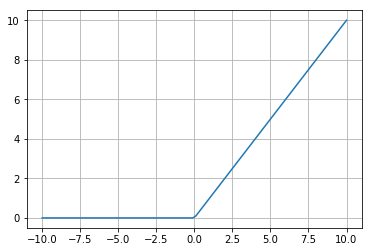

In [147]:
x_values = np.linspace(-10.0,10.0,100)
y_values = [f(x) for x in x_values]
plt.plot(x_values, y_values)
plt.grid()
plt.show()

# Fehler berechnen

In [76]:
y

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.])

In [77]:
one_hot_vec

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [78]:
error = one_hot_vec - y

In [79]:
error

array([-1.,  0., -1.,  0., -1., -1.,  0.,  1., -1., -1.])

In [80]:
alpha = 0.01
alpha * error

array([-0.01,  0.  , -0.01,  0.  , -0.01, -0.01,  0.  ,  0.01, -0.01, -0.01])

# Gewichtsaktualisierungen berechnen

Skalare Gewichtsänderungsberechnung:

In [61]:
for j in range(0, nr_outputs):
    for i in range(0,nr_inputs):
        delta_w = alpha * error[j] * x[i]
        print(delta_w)

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-3.92156885937e-05
-0.00368627458811
-0.00701960802078
-0.00207843154669
-0.000509803965688
-0.000352941192687
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00321568638086
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00870588302612
-0.00568627476692
-0.00392156898975
-0.000980392247438
-0.000980392247438
-0.000509803965688
-0.000862745121121
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00458823561668
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00819607913494
-0.00956862807274
-0.00615686297417
-0.00525490224361
-0.00145098045468
-0.00145098045468
-0.000274509824812
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.000196078438312
-0.00376470625401


-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.000509803965688
-0.00611764729023
-0.00992156922817
-0.00992156922817
-0.00968627512455
-0.00760784387589
-0.00282352954149
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00137254908681
-0.00592156887054
-0.00992156922817
-0.00992156922817
-0.00992156922817
-0.00756862819195
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00949019670486
-0.00996078491211
-0.00992156922817
-0.00992156922817
-0.00776470661163
-0.00250980407
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00105882361531
-0.00960784375668
-0.00996078491211
-0.00992156922817
-0.0084705889225
-0.00250980407
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00109803929925
-0.00588235318661
-0.00992156922817
-0.0098431378603


-0.0
-0.0
-0.0
-0.00384313762188
-0.00992156922817
-0.00992156922817
-0.0040784317255
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00129411771894
-0.00843137323856
-0.00992156922817
-0.00992156922817
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00764705955982
-0.00992156922817
-0.00992156922817
-0.00360784322023
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.00807843208313
-0.00811764776707
-0.00317647069693
-3.92156885937e-05
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.01
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-

Vektorielle Gewichtsänderungsberechnung:

In [81]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x

In [82]:
# Zeige letzten Gewichtsänderungsvektor
print(delta_w_vector.shape)
print(delta_w_vector)

(785,)
[ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000

Durchführung der Gewichtsänderung:

In [83]:
W.shape

(785, 10)

In [84]:
for j in range(0, nr_outputs):
    delta_w_vector = alpha * error[j] * x    
    W[:,j] =  W[:,j] + delta_w_vector

In [85]:
W.shape

(785, 10)

# Testen des Perzeptrons

In [86]:
W.shape

(785, 10)

In [87]:
nr_test_images = x_test.shape[0]

In [88]:
nr_test_images

10000

In [89]:
correct = 0

for test_img_nr in range(0,nr_test_images):
    row_vec = x_test[test_img_nr, :]
    one_hot_vec = y_test[test_img_nr, :]
    gt_label = np.argmax( one_hot_vec )
    #print(gt_label)
    
    x = np.append(row_vec,[1])
    
    # Aktivierungen der 10 Outputneurone berechnen
    act = np.matmul(x, W)
    
    # Outputs aller 10 Outputneurone berechnen
    out = f(act)
    
    # Was wurde prädiziert?
    is_label = np.argmax( out )
    
    #print(gt_label, is_label)
    
    if is_label == gt_label:
        correct += 1
        
print("Correct: ", correct)

Correct:  1074


In [90]:
def test_perceptron(W):
    
    correct = 0
    for test_img_nr in range(0,nr_test_images):
        row_vec = x_test[test_img_nr, :]
        one_hot_vec = y_test[test_img_nr, :]
        gt_label = np.argmax( one_hot_vec )
        #print(gt_label)

        x = np.append(row_vec,[1])

        # Aktivierungen der 10 Outputneurone berechnen
        act = np.matmul(x, W)

        # Outputs aller 10 Outputneurone berechnen
        out = f(act)

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)

        if is_label == gt_label:
            correct += 1     
            
    print("Correct: ", correct)

In [92]:
test_perceptron(W)

Correct:  1074


# Perzeptron Training

In [148]:
def train_perceptron(W, nr_train_steps, alpha):
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Feed Forward
        row_vec = x_train[rnd_img_nr, :]
        one_hot_vec = y_train[rnd_img_nr, :]
        x = np.append(row_vec,[1])
        act = np.matmul(x, W)
        out = f(act)
        
        # Fehlerberechnung
        error = one_hot_vec - y
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 1000 == 0:
            print("\nTrain step: ", train_step_nr)
            test_perceptron(W)

In [149]:
W = create_new_perceptron()

In [150]:
test_perceptron(W)

Correct:  491


In [152]:
alpha = 0.1
train_perceptron(W, 10000, alpha)


Train step:  0
Correct:  3899

Train step:  1000
Correct:  3866

Train step:  2000
Correct:  3887

Train step:  3000
Correct:  3891

Train step:  4000
Correct:  3911

Train step:  5000
Correct:  3917

Train step:  6000
Correct:  3922

Train step:  7000
Correct:  3927

Train step:  8000
Correct:  3914

Train step:  9000
Correct:  3909
